# Exploratory Data Analysis

Proyecto: Casa inteligente o Smart house

**Dataset**

Se analizará un dataset extraído de UCI Machine Learning Repository.

Contiene alrededor de 4 años de datos de consumo de electricidad para un hogar ubicado en francia, recopilados entre diciembre de 2006 y noviembre de 2010(47 meses). Los datos incluyen información sobre potencia activa global, potencia reactiva global, voltaje, intensidad global, submedición 1 (cocina), submedición 2. (lavadero), y submedición 3 (calentador de agua eléctrico y aire acondicionado). Con 2.075.259 mediciones en total y algunos valores faltantes en las mediciones (casi el 1,25% de las filas).
La informacion fue extraida de una casa localizada en Sceaux, Paris.

**Objetivos**
- Submedicion de mayor consumo.
- Franja horaria de mayor gasto.
- Prediccion energetica sobre la energia activa(Global_active_power)

**Variables**

- Date: Contiene la fecha en formato dd/mm/aaaa
- Time: Contiene la hora en formato hh/mm/ss
- Global_active_power: Contiene la potencia activa global promedio por minuto del hogar(en kilovatios o kW). KW
- global_reactive_power: potencia reactiva promedio por minuto global del hogar(en kilovatios) kW
- voltage o voltaje: voltaje promedio por minutos(en voltios) V
- Global_intensity: intensidad de corriente promedio por minuto global del hogar (en amperios) AMP
- Sub_metering_1: submedición de energía N°1 (en vatios por hora de energía activa). Corresponde a la cocina, que contiene principalmente lavavajillas, horno y microondas (los fogones no son eléctricos sino de gas). V/h
- Sub_metering_2: submedición de energía N° 2 (en vatios-hora de energía activa). Corresponde al lavadero, que contiene lavadora, secadora, frigorífico y luz. V/h
- Sub_metering_3: submedición de energía N° 3 (en vatios-hora de energía activa). Corresponde a un termo eléctrico y a un aire acondicionado. V/h

In [1]:
#from google.colab import drive
# tratamiento de datos
import numpy as np
import pandas as pd
import os
from os import sys
#graficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from math import *

# Funciones para graficar
import funciones as func

In [2]:
dfe = pd.read_csv('https://archive.ics.uci.edu/static/public/235/data.csv', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

C:\Users\Pablo\AppData\Local\Temp\ipykernel_8164\722316414.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dfe = pd.read_csv('https://archive.ics.uci.edu/static/public/235/data.csv',
C:\Users\Pablo\AppData\Local\Temp\ipykernel_8164\722316414.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dfe = pd.read_csv('https://archive.ics.uci.edu/static/public/235/data.csv',


In [3]:
dfe.sample(4)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2008-11-04 20:04:00,3.460,0.000,236.10,14.6,0.0,0.0,18.0
2008-12-09 01:49:00,0.290,0.052,244.15,1.2,0.0,0.0,0.0
2009-04-18 11:56:00,1.470,0.000,238.87,6.0,1.0,0.0,18.0
2007-01-23 12:52:00,0.288,0.104,243.97,1.2,0.0,0.0,0.0


In [4]:
print(dfe.isna().sum())
dfe[dfe['Sub_metering_3'].isna()]

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2010-09-28 19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


### Columnas de tiempo

In [6]:
"""
#Creamos una sola columna llamada date_time
dfe['date_time'] = pd.to_datetime(dfe['Date'] + ' ' + dfe['Time'])
#reasignamos el tipo de dato a las columnas de date y time.
dfe['Date']=pd.to_datetime(dfe['Date'])
dfe['Time']=pd.to_datetime(dfe['Time'])
#Creamos la columna 'weekday' que indica si el dia es un dia de la semana (weekday = 1) o si es fin de semana(weekday= 0 =weekend)
dfe['weekend'] = dfe['date_time'].apply(lambda x: x.weekday() < 5).astype(int)
#Creamos la columna 'weekday' que indica el numero de la semana. 0 = Lunes, 1 = Martes, 6 = Domingo
dfe['weekday'] = dfe['date_time'].apply(lambda x: x.weekday())

# Creamos las columnas de año, trimestre, mes y dia.
dfe['year'] = dfe['date_time'].apply(lambda x: x.year)
dfe['quarter'] = dfe['date_time'].apply(lambda x: x.quarter)
dfe['month'] = dfe['date_time'].apply(lambda x: x.month)
dfe['day'] = dfe['date_time'].apply(lambda x: x.day)
dfe['hour'] = dfe['date_time'].apply(lambda x: x.hour)

dfe.sort_values('date_time', inplace=True, ascending=True)
dfe.tail(5)
"""

"\n#Creamos una sola columna llamada date_time\ndfe['date_time'] = pd.to_datetime(dfe['Date'] + ' ' + dfe['Time'])\n#reasignamos el tipo de dato a las columnas de date y time.\ndfe['Date']=pd.to_datetime(dfe['Date'])\ndfe['Time']=pd.to_datetime(dfe['Time'])\n#Creamos la columna 'weekday' que indica si el dia es un dia de la semana (weekday = 1) o si es fin de semana(weekday= 0 =weekend)\ndfe['weekend'] = dfe['date_time'].apply(lambda x: x.weekday() < 5).astype(int)\n#Creamos la columna 'weekday' que indica el numero de la semana. 0 = Lunes, 1 = Martes, 6 = Domingo\ndfe['weekday'] = dfe['date_time'].apply(lambda x: x.weekday())\n\n# Creamos las columnas de año, trimestre, mes y dia.\ndfe['year'] = dfe['date_time'].apply(lambda x: x.year)\ndfe['quarter'] = dfe['date_time'].apply(lambda x: x.quarter)\ndfe['month'] = dfe['date_time'].apply(lambda x: x.month)\ndfe['day'] = dfe['date_time'].apply(lambda x: x.day)\ndfe['hour'] = dfe['date_time'].apply(lambda x: x.hour)\n\ndfe.sort_values('dat

<AxesSubplot: >

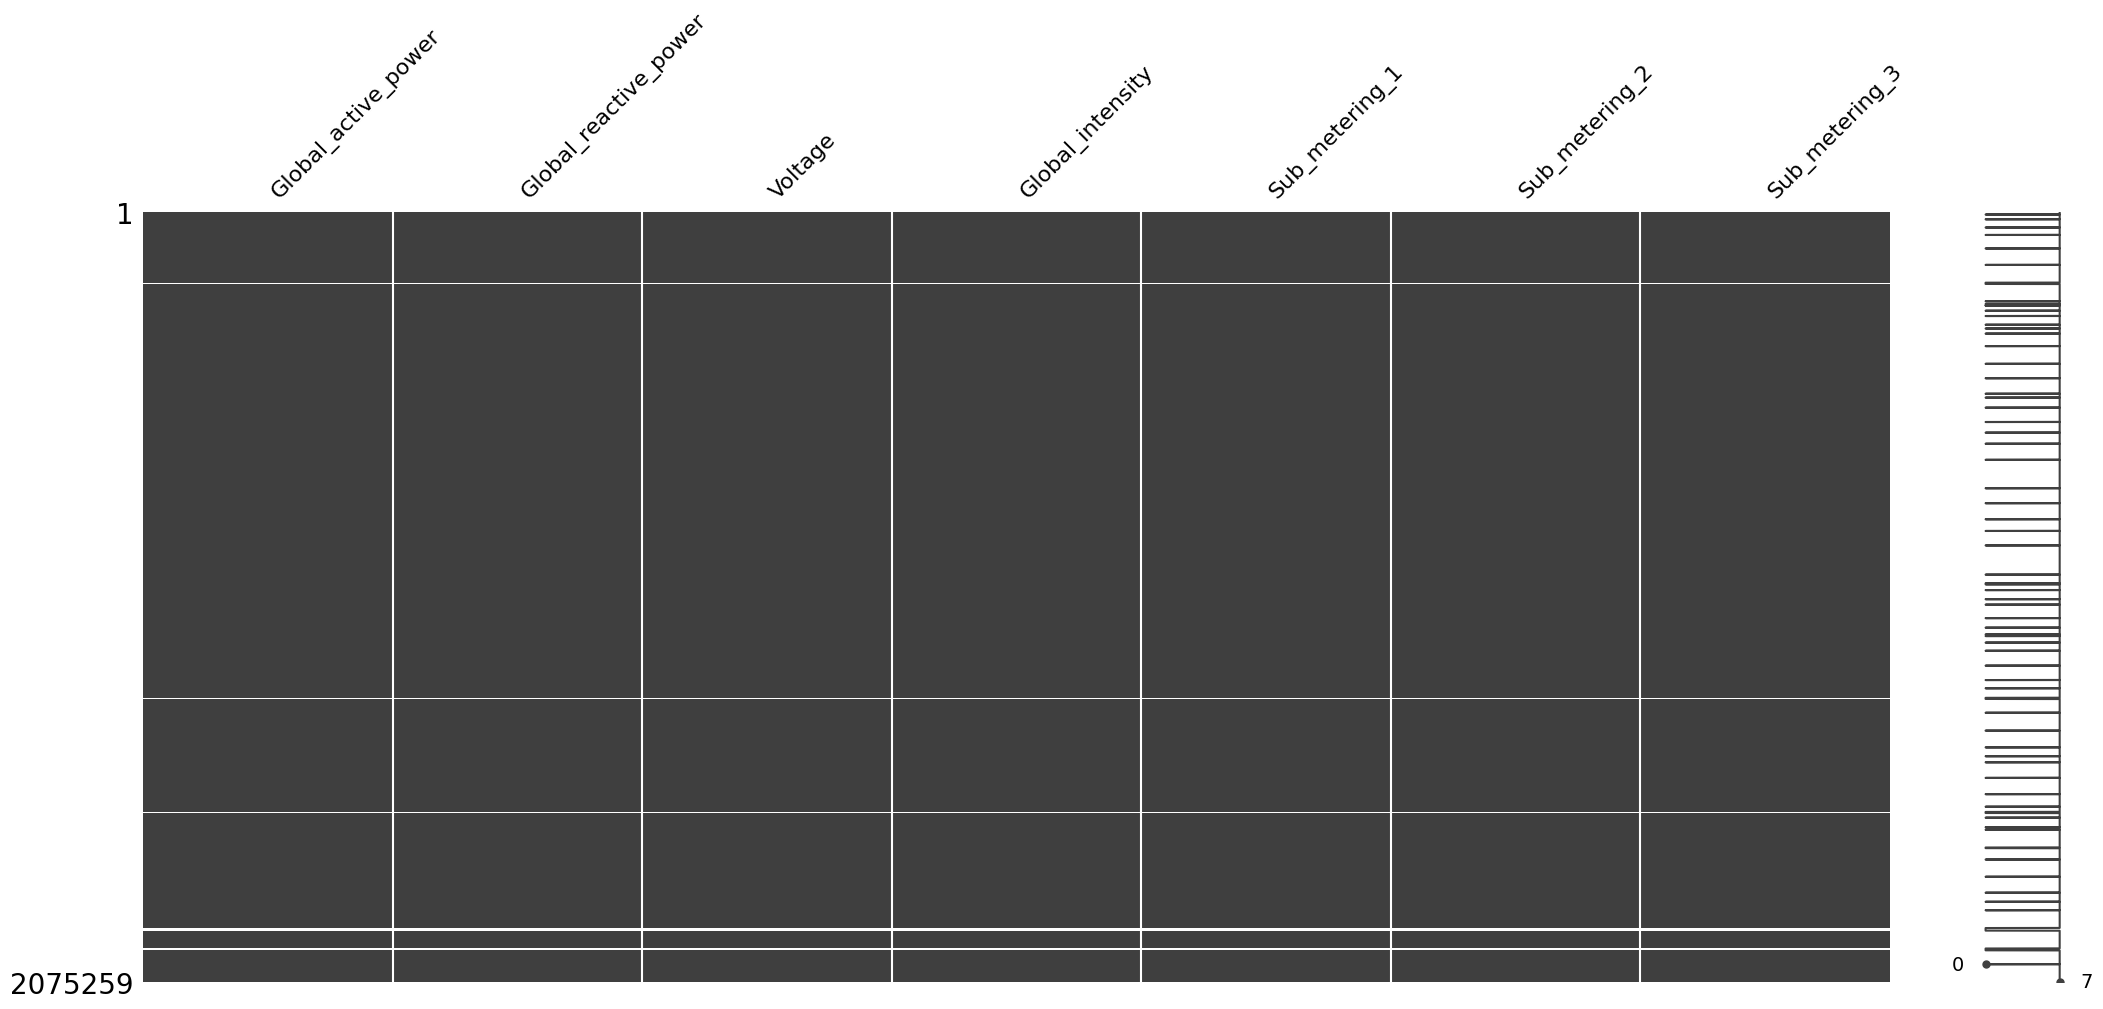

In [7]:
#pip install missingno
import missingno as msno
msno.matrix(dfe)

In [8]:
dfe.replace(to_replace='?',value=np.nan,inplace=True)

In [9]:
float_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in float_cols:
    dfe[col] = dfe[col].apply(lambda x: func.flotante(x))

### Columnas calculadas

Teniendo en cuenta que nos encontramos en un circuito alterno y en un sistema senoidal se calculara


#### 0) Eficiencia (Q=0 | Q!=0)
Esta columna corresponde los intervalos de tiempo de las instancias, es decir a cada minuto, donde la energia que se consumio, es solamente energia activa, por lo tanto esta columna, tendra valores de 1 cuando energia reactiva sea 0(Q=0), y valores de 0 cuando la energia reactiva sea desigual 0(Q!=0)


#### 1) Potencia aparente: S = √(P2+ Q2)

- P2 = Potencia activa global(Al cuadrado) kW
- Q2 = Potencia reactiva global(Al cuadrado) kW
- S = Potencia aparente en kW

El factor de potencia es el cociente de la relación de la potencia activa entre la potencia aparente

#### 2) Factor de potencia: fdp = P/S
- fdp = factor de potencia
- P = potencia activa en kW
- S = Potencia Aparente. en kW


#### 3) Angulo ϕ de la fase: ϕ = arcocoseno(FP) o ϕ = cos−1(FP)
- ϕ = angulo de la fase en grados
- FP = Factor de potencia
- Como la fórmula para el cálculo del ángulo de fase en función del factor de potencia es: FP = cos(ϕ). Esto significa que el ángulo de fase (ϕ) es el coseno inverso o arcocoseno del factor de potencia (FP).

#### 4) Impedancia(Z): Z = V/I
- Z = Impedancia en Ohmios
- V = voltaje en Voltios
- I = Intensidad en Amp

#### 5) Ángulo de fase de corriente (θi):

El ángulo de fase de la corriente () se refiere específicamente al ángulo entre la corriente y la tensión en un circuito de corriente alterna.
El ángulo de fase, en cambio, se refiere al ángulo entre la potencia activa y la potencia aparente.

El ángulo de fase de corriente (θi) se puede calcular a partir del factor de potencia (FP) y el ángulo de fase de la tensión (φ) utilizando la siguiente ecuación:

θi = arctan(-Q / (P * FP))

#### 6) Calcular la corriente compleja (I):

La corriente compleja (I) se define como el producto de la magnitud de la corriente (I) y el ángulo de fase de la corriente (θi) en forma fasorial:

I = I * [cos(θi) + j * sin(θi)]

#### 7) Calcular la corriente compleja conjugada (I*):

La corriente compleja conjugada (I*) se define como el complejo conjugado de la corriente compleja (I), es decir, se cambia el signo del ángulo de fase:

I* = I * [cos(-θi) - j * sin(-θi)]


Otras columnas extras que podrian llegar a calcularse, pero que en este trabajo no se realizaran son:

Reactancia(x): x = Z * sin(ϕ)
- x = reactancia  en Ohmios
- Z = impedancia en Ohmios
- ϕ = angulo de la fase en grados

Resistencia(r): r = √Z**2-X**2

- r = resistencia
- Z = impedancia total(al cuadrado)
- X = reactancia(al cuadrado)

Admitancia compleja:

La admitancia compleja (Y) se define como la suma de la admitancia real (Yre) y la admitancia imaginaria (Yim) y se puede calcular utilizando la siguiente ecuación:
- Y = Yre + j*Yim

- Admitancia real (Yre) = P / (V^2)
- Admitancia imaginaria (Yim) = Q / (V^2)
- j es la unidad imaginaria (-1)^0.5

magnitud de la admitancia:

La magnitud de la admitancia (|Y|) se define como la raíz cuadrada de la suma de los cuadrados de la admitancia real (Yre) y la admitancia imaginaria (Yim) y se puede calcular utilizando la siguiente ecuación:

- |Y| = sqrt(Yre^2 + Yim^2)

Ángulo de fase de la admitancia:

El ángulo de fase de la admitancia (θy) es el ángulo opuesto a la admitancia imaginaria (Yim) y se puede calcular utilizando la siguiente ecuación:

- θy = arctan(Yim / Yre)

Potencia compleja (S):

La potencia compleja (S) se calcula como el producto del voltaje complejo (V) y la corriente compleja conjugada (I*):

- S = V * I*

In [10]:
dfe['eficiencia'] = np.where(dfe['Global_reactive_power'] == 0,1,0)
# Potencia Aparente
pag = dfe.Global_active_power*1000
prg = dfe.Global_reactive_power*1000
potencia_aparente = (pag**2)+(prg**2)
potencia_aparente = potencia_aparente.apply(lambda x: sqrt(x))
dfe.insert(loc=4,column='apparent_power',value=potencia_aparente)
# Factor de potencia
pf = (dfe.Global_active_power/(dfe.apparent_power/1000))
dfe.insert(loc=4,column='power_factor',value=pf)
# Ángulo de fase
angulo_fase = dfe.power_factor.values
angulo = []
angulo_radianes = 180/np.pi
for x in angulo_fase:
  angulo.append((acos(x))*angulo_radianes) # se multiplica por 180/pi para obtener el valor en grados
dfe.insert(loc=5,column='phase_angle',value=pd.Series(angulo))
# Impedancia
imp = (dfe.Voltage/dfe.Global_intensity)
dfe.insert(loc=5,column='impedance',value=imp)
# Ángulo de fase de corriente, corriente compleja y corriente compleja conjugada
dfe["theta_i"] = np.arctan(-dfe["Global_reactive_power"] / (dfe["Global_reactive_power"] * dfe["power_factor"]))
dfe["I_complex"] = dfe["Global_intensity"] * (np.cos(dfe["theta_i"]) + 1j * np.sin(dfe["theta_i"]))
#dfe["I_complex_conjugado"] = np.array(dfe["I_complex"]).conjugate()

In [11]:
dfe_h = dfe.reset_index()
dfe_h = dfe_h.resample('H',on='dt').sum()
dfe_h['Voltage'] = dfe_h['Voltage']/60

Text(0, 0.5, 'kWh')

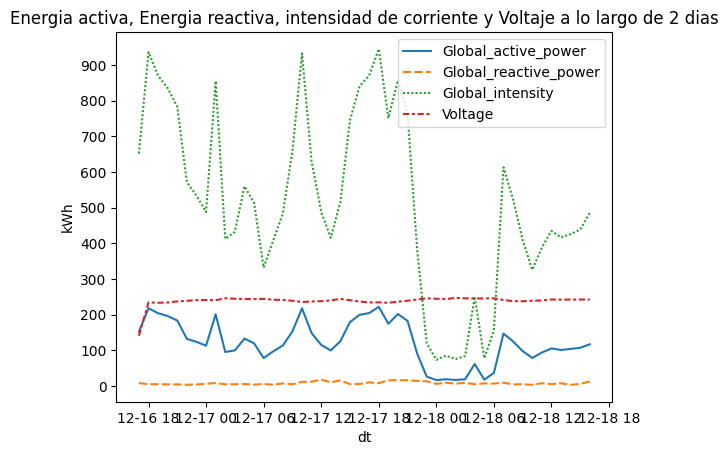

In [12]:
tick = range(0,1000,100)
sns.lineplot(data=dfe_h[:48][['Global_active_power','Global_reactive_power','Global_intensity','Voltage']])
plt.title('Energia activa, Energia reactiva, intensidad de corriente y Voltaje a lo largo de 2 dias')
plt.yticks(ticks=tick)
plt.ylabel('kWh')

Text(0.5, 0, 'horas')

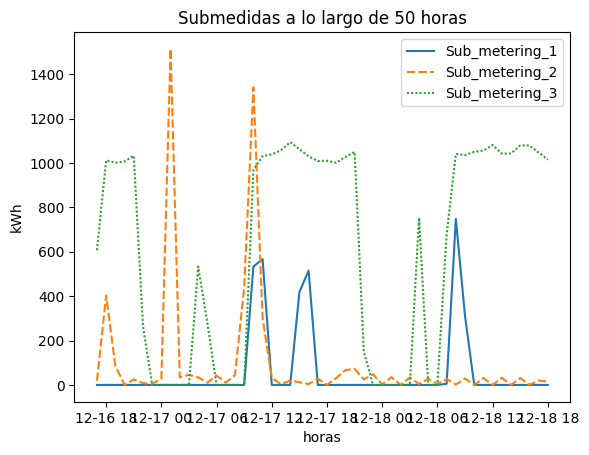

In [13]:
sns.lineplot(data=dfe_h[:50][['Sub_metering_1','Sub_metering_2','Sub_metering_3']])
plt.title('Submedidas a lo largo de 50 horas')
plt.ylabel('kWh')
plt.xlabel('horas')

In [14]:
dfe.drop(columns=['phase_angle'],axis=1,inplace=True)
dfe_h.drop(columns=['phase_angle'],axis=1,inplace=True)

c:\Users\Pablo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\managers.py:1794: ComplexWarning: Casting complex values to real discards the imaginary part
  result[rl.indexer] = arr
c:\Users\Pablo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\managers.py:1794: ComplexWarning: Casting complex values to real discards the imaginary part
  result[rl.indexer] = arr


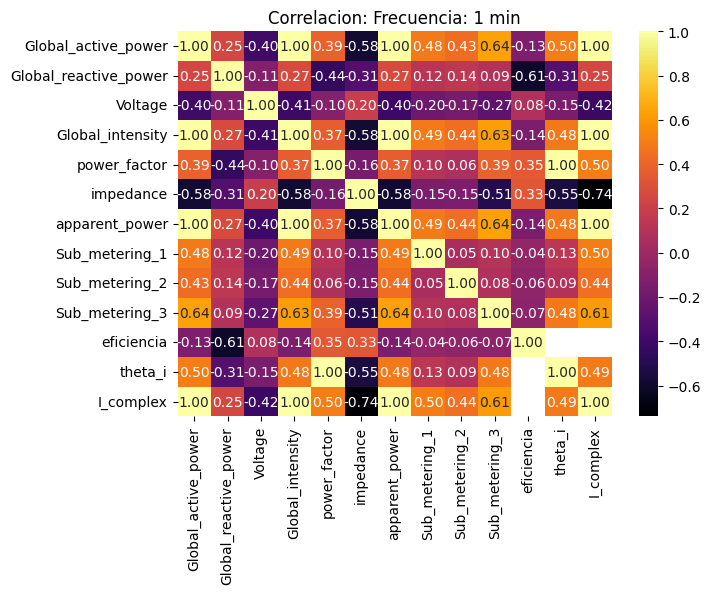

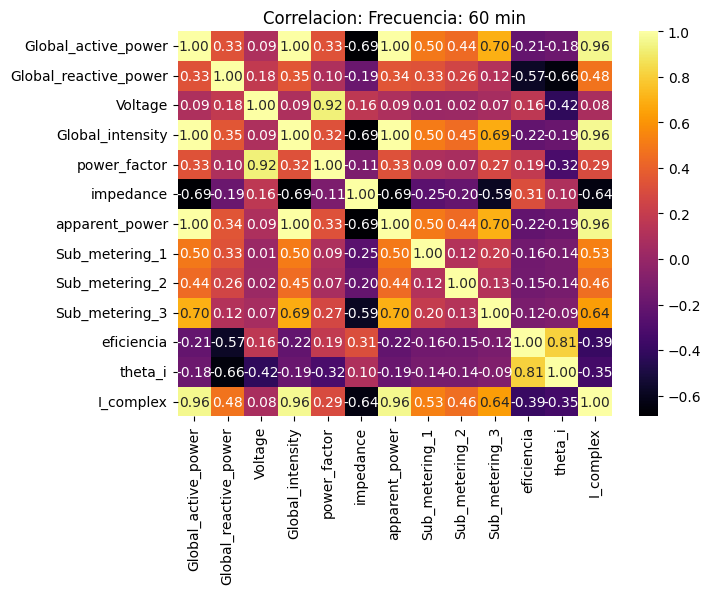

c:\Users\Pablo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\managers.py:1794: ComplexWarning: Casting complex values to real discards the imaginary part
  result[rl.indexer] = arr


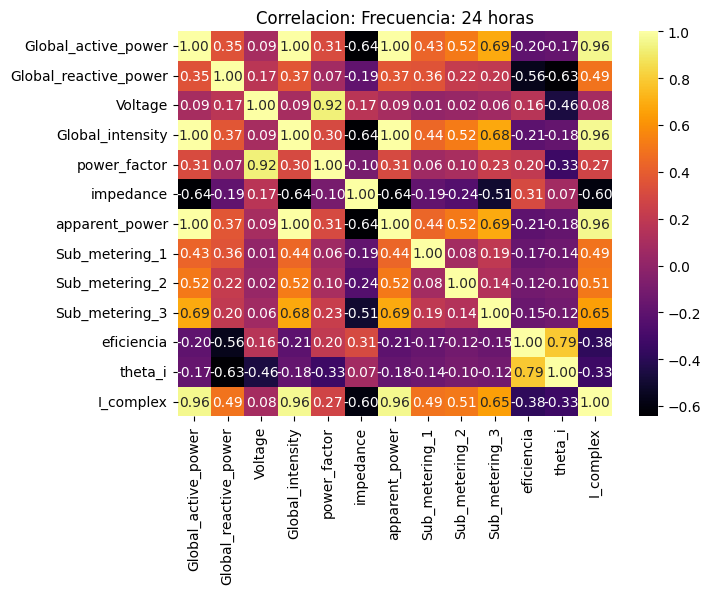

In [15]:
plt.figure(figsize=(7, 5))
sns.heatmap(dfe.corr(), annot=True, cmap='inferno', fmt=".2f")
plt.title('Correlacion: Frecuencia: 1 min')
plt.figure(figsize=(7, 5))
sns.heatmap(dfe_h.corr(), annot=True, cmap='inferno', fmt=".2f")
plt.title('Correlacion: Frecuencia: 60 min')
plt.show()
plt.figure(figsize=(7, 5))
sns.heatmap(dfe_h.asfreq('24H').corr(), annot=True, cmap='inferno', fmt=".2f")
plt.title('Correlacion: Frecuencia: 24 horas')
plt.show()

# Distribucion y outliers

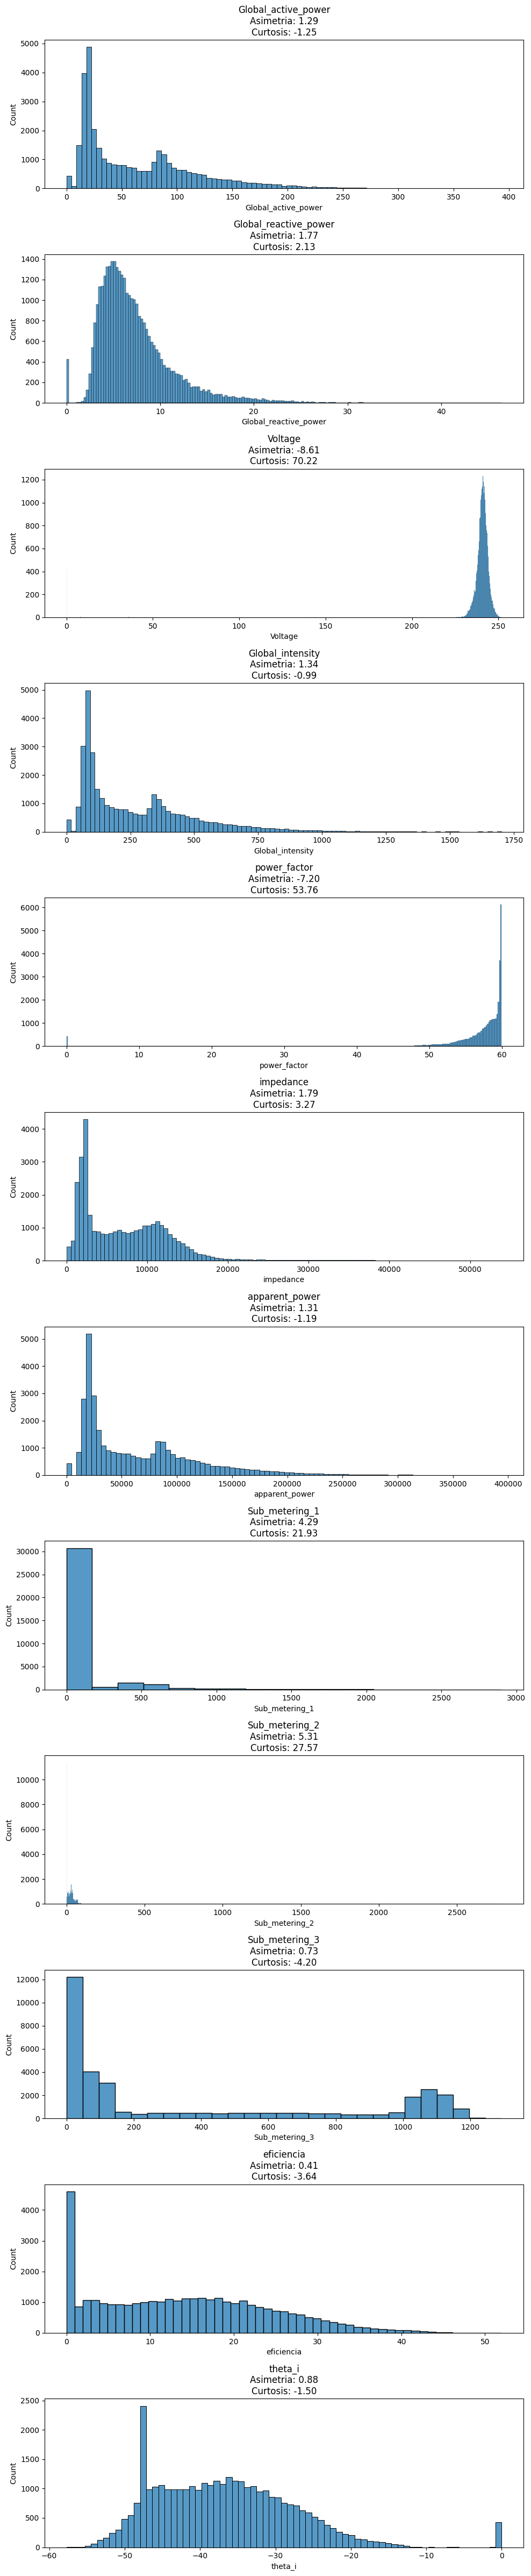

In [16]:
dfe_h.drop(columns=['I_complex'],axis=1,inplace=True)
columnas = dfe_h.columns
figura = func.graficar_histogramas(dfe_h,columnas)
plt.show()

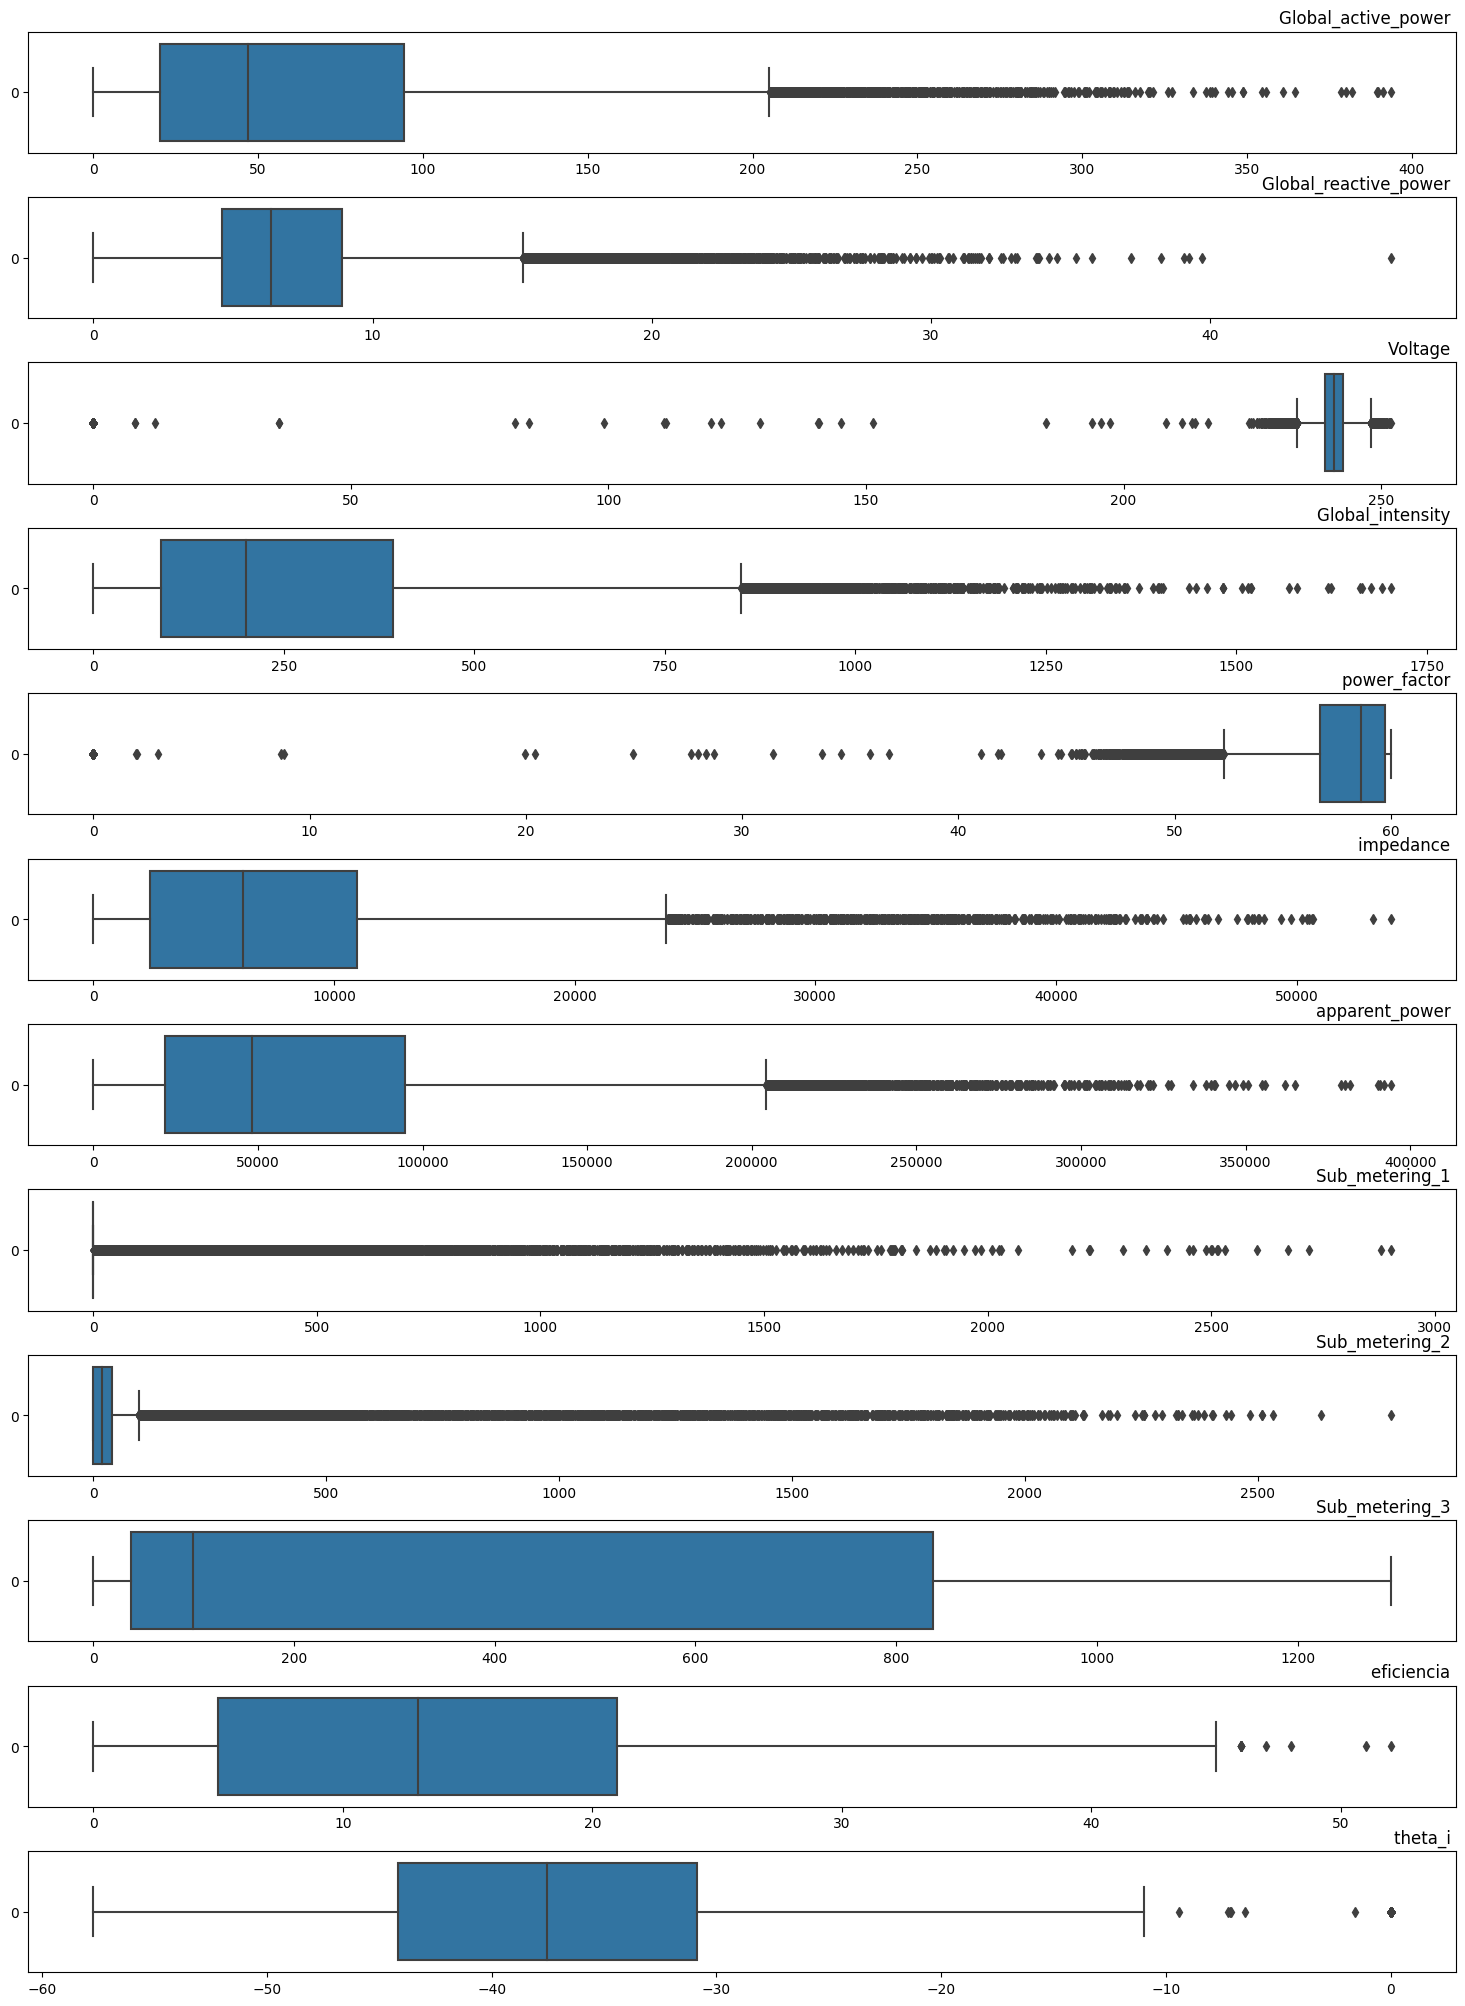

In [17]:
box_plot = func.grafico_de_caja(dfe_h,columnas)

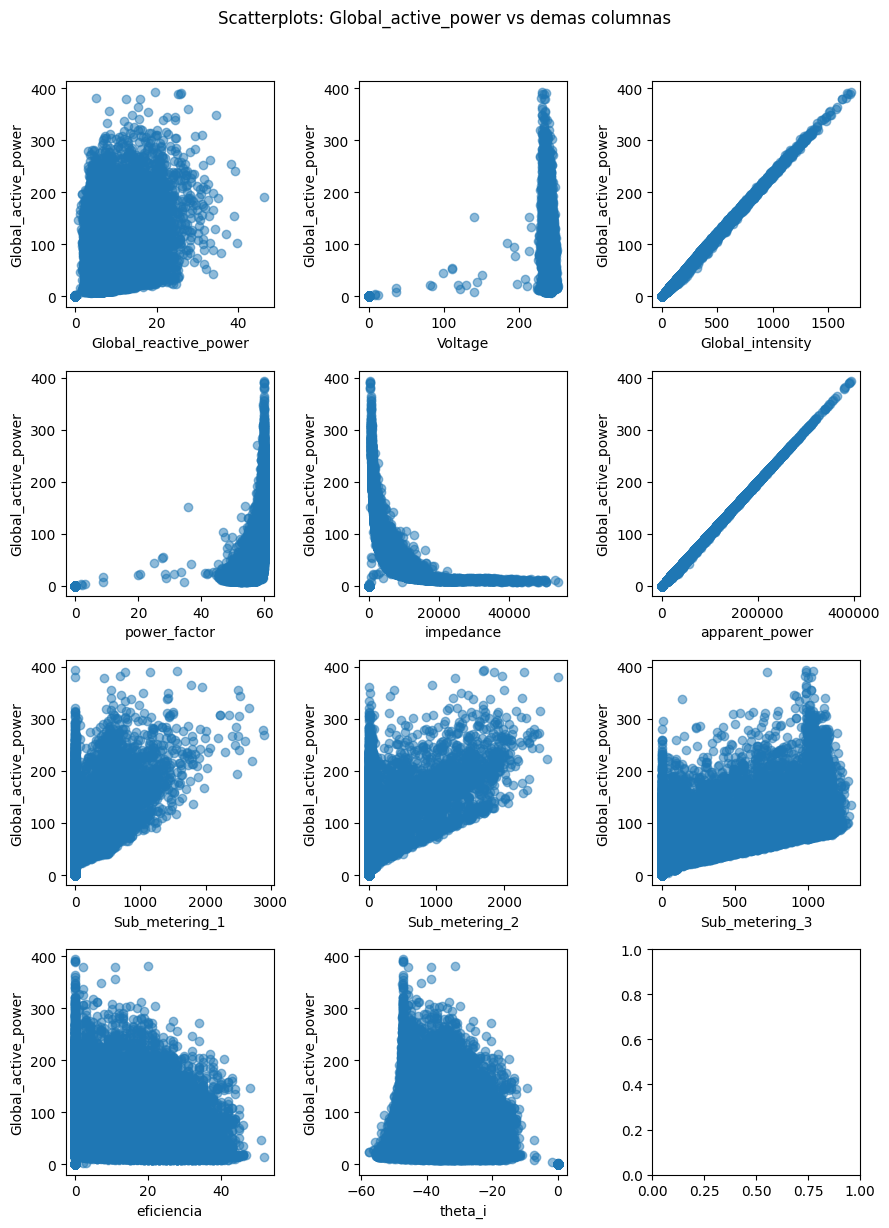

In [18]:
func.target(dfe_h, 'Global_active_power')

In [19]:
dfe_h.reset_index(inplace=True)

In [20]:
dfe_h['weekend'] = dfe_h['dt'].apply(lambda x: x.weekday() < 5).astype(int)
#Creamos la columna 'weekday' que indica el numero de la semana. 0 = Lunes, 1 = Martes, 6 = Domingo
dfe_h['weekday'] = dfe_h['dt'].apply(lambda x: x.weekday())
# Creamos las columnas de año, trimestre, mes y dia.
dfe_h['year'] = dfe_h['dt'].apply(lambda x: x.year)
dfe_h['quarter'] = dfe_h['dt'].apply(lambda x: x.quarter)
dfe_h['month'] = dfe_h['dt'].apply(lambda x: x.month)
dfe_h['day'] = dfe_h['dt'].apply(lambda x: x.day)
dfe_h['hour'] = dfe_h['dt'].apply(lambda x: x.hour)


### Marcos temporales

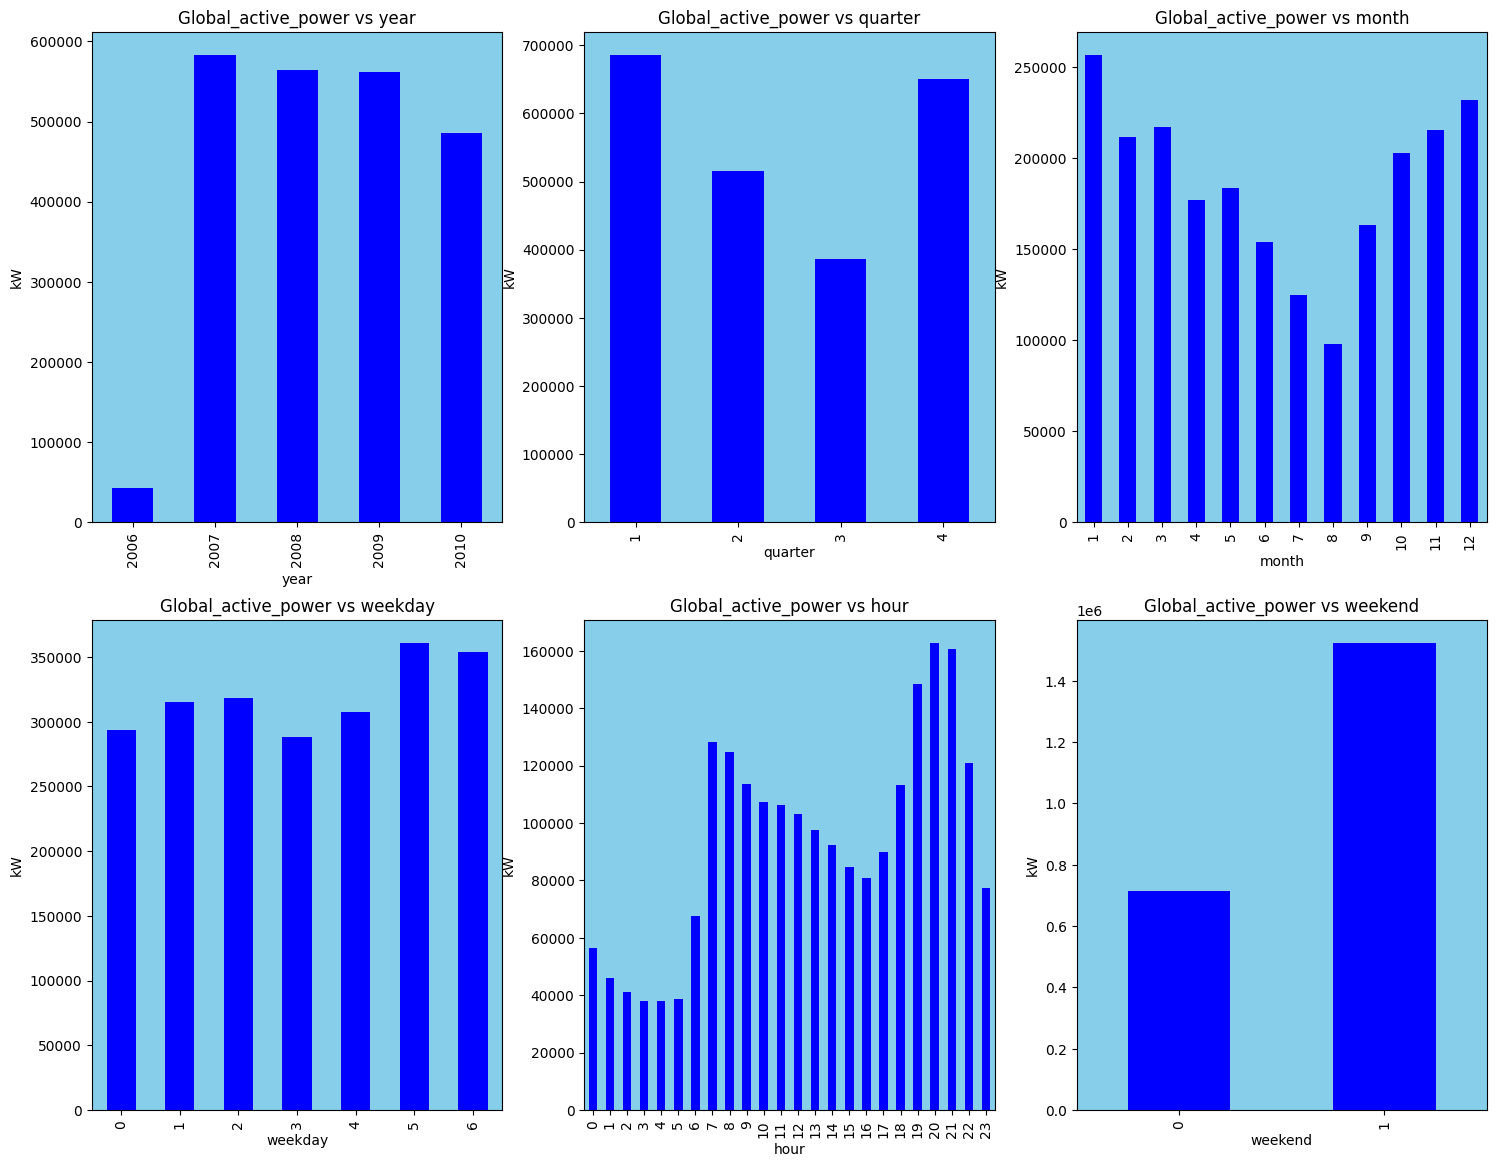

In [21]:
func.variable_tiempo(dfe_h,'Global_active_power')

Como los datos corresponden a una casa situada en francia, sabemos que el verano comienza a partir del 21 de junio. 
El año 2006 podria excluirse del analisis debido a la falta de datos que el mismo presenta.

**Energia activa total o global**

- Año: Podemos observar que la energia activa fue disminuyendo a partir del año 2007.

- Trimestre/Mes: El gasto de energia activa se ve en caida durante el perido de invierno-primavera, aunque el gasto es mayor en invierno que verano y el cuarto con menor gasto de energia activa es verano(3er cuarto)

- Hora: El mayor consumo energetico se encuentra en la franja horaria 19h-21h y el menor consumo en las primeras 6 horas del dia.

- Fin de semana: Cabe mencionar que la suma de los dias de fin de semana llega casi a 12.500 kW consumidos contra aprox. 25.000 kW de los dias de la semana, es decir que los fines de semana es mayor el consumo por la diferencia de dias(2 dias = 12.500 kW es decir, 6.250kW por dia vs 5 dias = 25.000kW que equivalen a 5.000 kW por dia.) Porcentualmente durante los fines de semana el consumo de energia es un 25% mayor.

**Impedancia**
impedancia o resistencia(mal llamada):

Alta impedancia: flujo de corriente limitado, baja impedancia: flujo de corriente mas libre, mas optimo.
- Respecto a las horas, se puede decir que existe una mayor impedancia durante la noche(23h-06h).
- El trimestre con mayor resistencia medida en Ohms es el tercer trimestre, como vimos que coincide con el trimestre de menor gasto de energia activa.
- El mes con mayor resistencia es agosto.

In [22]:
dfe.reset_index(inplace=True)

Text(0.5, 0, 'minutos')

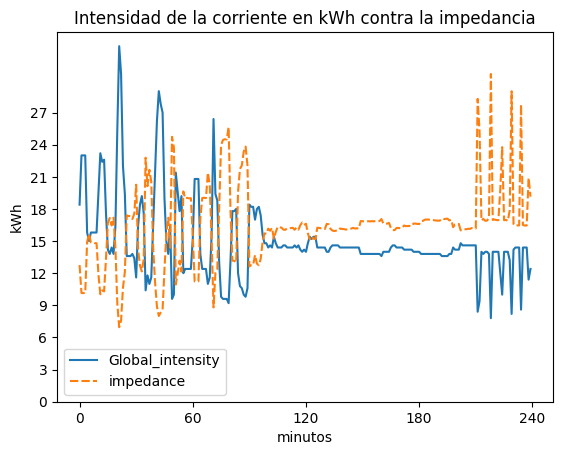

In [23]:
tick_y = range(0,30,3)
tick_x = range(0,250,60)
sns.lineplot(data=dfe[:240][['Global_intensity','impedance']])
plt.title('Intensidad de la corriente en kWh contra la impedancia')
plt.yticks(ticks=tick_y)
plt.xticks(ticks=tick_x)
plt.ylabel('kWh')
plt.xlabel('minutos')

<AxesSubplot: >

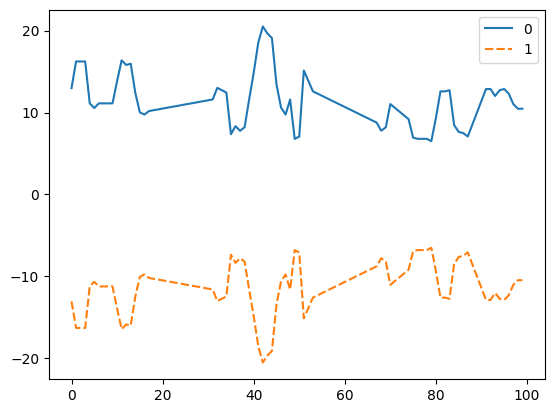

In [24]:
parte_real = [x.real for x in dfe['I_complex']]
parte_imaginaria = [x.imag for x in dfe['I_complex']]
sns.lineplot(data=[parte_real[:100],parte_imaginaria[:100]])

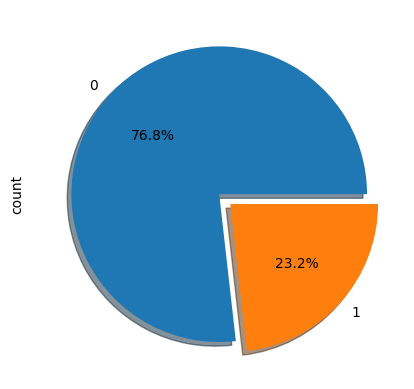

In [25]:
dfe['eficiencia'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()